# Importing Necesseties

In [1]:
!pip install -r ../resources/requirements.txt



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from transformers import pipeline

# Any results you write to the current directory are saved as output.

**Below is a helper Function which generates random colors which can be used to give different colors to your plots.Feel free to use it**

In [48]:
data = pd.read_csv('../../resources/data/english_tweet.csv')
data['tweet'] = data['en_tweet']
data.drop(columns=['en_tweet', "Unnamed: 0"], inplace=True)
data

,label,tweet
0,anger,"As for Jaitiru, the police can't handle the go..."
1,anger,"You know, it's supposed to be the girls who ha..."
2,happy,"Amad Photo from Google, deliberately, so that ..."
3,anger,"Jatararu Street, part of Mr. Brother's territo..."
4,happy,"Share the experience, yesterday at 6: 00 p.m.,..."
...,...,...
4396,love,Did you know that at that moment I closed her ...
4397,fear,The difficulty of assigning Vice President Jok...
4398,anger,Five. Her future's not clear. Yeah.
4399,happy,[USERNAME] There was actually a student of UI ...


In [49]:
data['Num_word_tweet'] = data['tweet'].apply(lambda x: len(str(x).split()))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet
0,anger,"As for Jaitiru, the police can't handle the go...",32
1,anger,"You know, it's supposed to be the girls who ha...",27
2,happy,"Amad Photo from Google, deliberately, so that ...",14
3,anger,"Jatararu Street, part of Mr. Brother's territo...",31
4,happy,"Share the experience, yesterday at 6: 00 p.m.,...",25


Let's look at the distribution of Meta-Features

* The number of words plot is really interesting ,the tweets having number of words greater than 150 are less likely to be part from happy, sadness or anger

In [50]:
data['mentions'] = data['tweet'].apply(
    lambda x: x.count('[USERNAME]') + x.count('username'))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet,mentions
0,anger,"As for Jaitiru, the police can't handle the go...",32,1
1,anger,"You know, it's supposed to be the girls who ha...",27,0
2,happy,"Amad Photo from Google, deliberately, so that ...",14,0
3,anger,"Jatararu Street, part of Mr. Brother's territo...",31,0
4,happy,"Share the experience, yesterday at 6: 00 p.m.,...",25,0


We can see some interesting trends here:
* Happy tweets have less mentions on other
* Anger,Happy and Sadness tweets are longer than fear and love


## Lets talk hashtags!

In [51]:
data['hashtags'] = data['tweet'].apply(lambda x: x.count('#'))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet,mentions,hashtags
0,anger,"As for Jaitiru, the police can't handle the go...",32,1,0
1,anger,"You know, it's supposed to be the girls who ha...",27,0,0
2,happy,"Amad Photo from Google, deliberately, so that ...",14,0,0
3,anger,"Jatararu Street, part of Mr. Brother's territo...",31,0,0
4,happy,"Share the experience, yesterday at 6: 00 p.m.,...",25,0,0


In [52]:
indo_stop_words = stopwords.words(fileids='english')
indo_stop_words.append("username")
indo_stop_words.append("url")

In [53]:

data['stop_word_count'] = data['tweet'].apply(
    lambda x: len([w for w in str(x).lower().split() if w in indo_stop_words]))


## Lets see some of the most common words per category

B### Cleaning the Corpus
Now Before We Dive into extracting information out of words in text and selected text,let's first clean the data

In [54]:
data

,label,tweet,Num_word_tweet,mentions,hashtags,stop_word_count
0,anger,"As for Jaitiru, the police can't handle the go...",32,1,0,9
1,anger,"You know, it's supposed to be the girls who ha...",27,0,0,14
2,happy,"Amad Photo from Google, deliberately, so that ...",14,0,0,5
3,anger,"Jatararu Street, part of Mr. Brother's territo...",31,0,0,9
4,happy,"Share the experience, yesterday at 6: 00 p.m.,...",25,0,0,8
...,...,...,...,...,...,...
4396,love,Did you know that at that moment I closed her ...,39,0,0,24
4397,fear,The difficulty of assigning Vice President Jok...,36,0,4,16
4398,anger,Five. Her future's not clear. Yeah.,6,0,0,2
4399,happy,[USERNAME] There was actually a student of UI ...,23,1,0,11


t## Initial modal

In [55]:
# def clean_text(text):
#     '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
#     and remove words containing numbers.'''
#     text = str(text).lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     return text
#
#
# data['tweet'] = data['tweet'].apply(lambda x: clean_text(x))
# data

In [56]:
def remove_stopword(x):
    return " ".join([y for y in x.split() if y not in indo_stop_words])
data['tweet'] = data['tweet'].apply(lambda x: remove_stopword(x))

In [57]:
data['punctuation_count'] = data['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
data['char_count'] = data['tweet'].apply(lambda x: len(str(x)))
data['unique_word_count'] = data['tweet'].apply(lambda x: len(set(str(x).split())))
data['url_count'] = data['tweet'].apply(lambda x: x.lower().count("url"))



In [58]:
data

,label,tweet,Num_word_tweet,mentions,hashtags,stop_word_count,punctuation_count,char_count,unique_word_count,url_count
0,anger,"As Jaitiru, police can't handle governor.Emang...",32,1,0,9,33,231,23,1
1,anger,"You know, supposed girls busy keeping busy, fe...",27,0,0,14,4,94,14,0
2,happy,"Amad Photo Google, deliberately, friends imagi...",14,0,0,5,4,73,9,0
3,anger,"Jatararu Street, part Mr. Brother's territory....",31,0,0,9,12,177,22,0
4,happy,"Share experience, yesterday 6: 00 p.m., cancel...",25,0,0,8,9,116,17,0
...,...,...,...,...,...,...,...,...,...,...
4396,love,Did know moment I closed eyes held back turmoi...,39,0,0,24,3,95,16,0
4397,fear,The difficulty assigning Vice President Jokowi...,36,0,4,16,6,151,19,0
4398,anger,Five. Her future's clear. Yeah.,6,0,0,2,4,31,5,0
4399,happy,[USERNAME] There actually student UI Technique...,23,1,0,11,4,102,13,0


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Encode labels
encode_labels = LabelEncoder().fit_transform(data["label"])
# Train-test split
msg_train, msg_test, label_train, label_test = train_test_split(
    data.drop(columns=["label"]), encode_labels, test_size=0.1, random_state=42
)

# Suppose df has columns 'tweet' (text) and various numeric feature columns
text_col = 'tweet'
meta_cols = ['Num_word_tweet', 'mentions', 'hashtags', 'punctuation_count',
             'char_count', 'unique_word_count', 'stop_word_count', 'url_count']

preprocessor = ColumnTransformer([
    ('tfidf', TfidfVectorizer(), text_col),
    ('meta', StandardScaler(), meta_cols),
], remainder='drop')

pipeline = Pipeline([
    ('features', preprocessor),
    ('classifier', XGBClassifier(random_state=42)), ])

# Train & evaluate
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)
print("Accuracy:", accuracy_score(label_test, predictions))
print(classification_report(label_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(label_test, predictions))


Accuracy: 0.4852607709750567
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       119
           1       0.51      0.35      0.42        62
           2       0.57      0.44      0.50       111
           3       0.60      0.60      0.60        55
           4       0.33      0.44      0.37        94

    accuracy                           0.49       441
   macro avg       0.51      0.48      0.49       441
weighted avg       0.50      0.49      0.49       441

Confusion Matrix:
 [[69  6 12  3 29]
 [16 22  7  1 16]
 [19  4 49 10 29]
 [ 4  2  5 33 11]
 [23  9 13  8 41]]


## Trying basic NN

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class TextMetaClassifier(nn.Module):
    def __init__(self, text_input_dim, meta_input_dim, hidden_dim, output_dim):
        super().__init__()
        # Branch for text features
        self.text_fc = nn.Linear(text_input_dim, hidden_dim)
        # Branch for metadata features
        self.meta_fc = nn.Linear(meta_input_dim, hidden_dim)
        # Combined layers

        self.combined_fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.combined_fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, text_x, meta_x):
        # text_x: (batch_size, text_input_dim)
        # meta_x: (batch_size, meta_input_dim)
        t1 = F.relu(self.text_fc(text_x))
        m = F.relu(self.meta_fc(meta_x))
        # Concatenate along feature dimension
        x = torch.cat((t1, m), dim=1)
        x = F.relu(self.combined_fc1(x))
        out = self.combined_fc2(x)
        return out


In [24]:
from sklearn.preprocessing import MinMaxScaler

num_cols = data.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])


In [25]:
data

,label,tweet,Num_word_tweet,mentions,hashtags,stop_word_count,punctuation_count,char_count,unique_word_count,url_count
0,anger,jaitiru police cant handle governoremangany po...,0.164894,0.047619,0.000000,0.200000,0.0,0.202368,0.677419,0.0
1,anger,know supposed girls busy keeping busy feeling ...,0.138298,0.000000,0.000000,0.311111,0.0,0.092573,0.387097,0.0
2,happy,amad photo google deliberately friends imagine...,0.069149,0.000000,0.000000,0.111111,0.0,0.071044,0.258065,0.0
3,anger,jatararu street part mr brothers territory jwb...,0.159574,0.000000,0.000000,0.200000,0.0,0.167922,0.645161,0.0
4,happy,share experience yesterday pm canceling ticket...,0.127660,0.000000,0.000000,0.177778,0.0,0.102260,0.419355,0.0
...,...,...,...,...,...,...,...,...,...,...
4396,love,know moment closed eyes held back turmoil soul...,0.202128,0.000000,0.000000,0.533333,0.0,0.082885,0.387097,0.0
4397,fear,difficulty assigning vice president jokowis el...,0.186170,0.000000,0.121212,0.355556,0.0,0.141012,0.548387,0.0
4398,anger,five futures clear yeah,0.026596,0.000000,0.000000,0.044444,0.0,0.024758,0.129032,0.0
4399,happy,actually student ui techniques shot girlfriend...,0.117021,0.047619,0.000000,0.244444,0.0,0.089343,0.354839,0.0


In [26]:
tfidfVectorizer = TfidfVectorizer().fit(data[text_col])

In [27]:
train_data, test_data, label_train, label_test = train_test_split(
    data.drop(columns=["label"]), encode_labels, test_size=0.2, random_state=42
)

In [28]:
def prepare_data_to_nn(data, labels):
    meta_array = data[meta_cols].to_numpy()
    tfidf_array = tfidfVectorizer.transform(data[text_col]).toarray()
    one_hot_tensor_label = pd.get_dummies(labels).to_numpy(dtype="long")
    return meta_array, tfidf_array, one_hot_tensor_label


In [36]:
import numpy as np
from torch.utils.data import Dataset, DataLoader


class TextMetaDataset(Dataset):
    def __init__(self, text_feats, meta_feats, labels):
        self.text_feats = torch.tensor(text_feats, dtype=torch.float32)
        self.meta_feats = torch.tensor(meta_feats, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.text_feats[idx], self.meta_feats[idx], self.labels[idx]


tfidf_array_train, meta_array_train, one_hot_tensor_label_train = prepare_data_to_nn(train_data, label_train)
train_ds = TextMetaDataset(tfidf_array_train, meta_array_train, one_hot_tensor_label_train)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

tfidf_arra_testy, meta_array_test, one_hot_tensor_label_test = prepare_data_to_nn(test_data, label_test)
test_ds = TextMetaDataset(tfidf_arra_testy, meta_array_test, one_hot_tensor_label_test)
test_loader = DataLoader(test_ds, batch_size=len(label_test))

=== Random Oversampling ===
Original class distribution: Counter({np.int64(0): 872, np.int64(2): 803, np.int64(4): 797, np.int64(1): 530, np.int64(3): 518})
After random oversampling: Counter({np.int64(4): 872, np.int64(2): 872, np.int64(3): 872, np.int64(1): 872, np.int64(0): 872})

=== SMOTE Oversampling ===
Original class distribution: Counter({np.int64(0): 872, np.int64(2): 803, np.int64(4): 797, np.int64(1): 530, np.int64(3): 518})
After SMOTE oversampling: Counter({np.int64(4): 872, np.int64(2): 872, np.int64(3): 872, np.int64(1): 872, np.int64(0): 872})

=== Weighted Sampling ===
Original class distribution: Counter({np.int64(0): 872, np.int64(2): 803, np.int64(4): 797, np.int64(1): 530, np.int64(3): 518})
Using weighted sampler with class weights: {np.int64(4): 0.0012547051442910915, np.int64(2): 0.0012453300124533001, np.int64(3): 0.0019305019305019305, np.int64(1): 0.0018867924528301887, np.int64(0): 0.0011467889908256881}


In [42]:
model = TextMetaClassifier(tfidf_array_train.shape[1], meta_array_train.shape[1], hidden_dim=128,
                           output_dim=len(set(data["label"])))
optimizer = torch.optim.Adagrad(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

In [44]:
losses_train = []
acc_train = []
acc_val = []
for epoch in range(1000):
    model.train()
    losses_batch = []
    acc_batch = []
    for text_x, meta_x, y in train_loader:
        optimizer.zero_grad()
        outputs = model(text_x, meta_x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        losses_batch.append(loss.item())  # convert to numbers (0/1)
        acc_batch.append(100 * torch.mean(
            (torch.argmax(y, axis=1) == np.argmax(y, axis=1)).float()).item())
    acc_train.append(np.mean(acc_batch))
    losses_train.append(np.mean(losses_batch))
    # test accuracy
    model.eval()
    text_x, meta_x, y = next(iter(test_loader))  # extract X,y from test dataloader
    with torch.no_grad():  # deactivates autograd
        yHat = model(text_x, meta_x)
    acc_val.append(
        100 * torch.mean((torch.argmax(yHat, axis=1) == np.argmax(one_hot_tensor_label_test, axis=1)).float()))

    print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')


Epoch 1, Loss: 0.4890
Epoch 2, Loss: 0.4308
Epoch 3, Loss: 0.2661
Epoch 4, Loss: 0.1363
Epoch 5, Loss: 0.0108
Epoch 6, Loss: 0.0024
Epoch 7, Loss: 0.0310
Epoch 8, Loss: 0.0027
Epoch 9, Loss: 0.0023
Epoch 10, Loss: 0.0034
Epoch 11, Loss: 0.0008
Epoch 12, Loss: 0.0013
Epoch 13, Loss: 0.1216
Epoch 14, Loss: 0.0012
Epoch 15, Loss: 0.0009
Epoch 16, Loss: 0.0004
Epoch 17, Loss: 0.0089
Epoch 18, Loss: 0.0009
Epoch 19, Loss: 0.0007
Epoch 20, Loss: 0.0008
Epoch 21, Loss: 0.0017
Epoch 22, Loss: 0.0001
Epoch 23, Loss: 0.0001
Epoch 24, Loss: 0.0003
Epoch 25, Loss: 0.0001
Epoch 26, Loss: 0.0002
Epoch 27, Loss: 0.0001
Epoch 28, Loss: 0.0000
Epoch 29, Loss: 0.0001
Epoch 30, Loss: 0.0002
Epoch 31, Loss: 0.0002
Epoch 32, Loss: 0.0000
Epoch 33, Loss: 0.0000
Epoch 34, Loss: 0.0001
Epoch 35, Loss: 0.0001
Epoch 36, Loss: 0.0000
Epoch 37, Loss: 0.0002
Epoch 38, Loss: 0.0003
Epoch 39, Loss: 0.0005
Epoch 40, Loss: 0.0006
Epoch 41, Loss: 0.0000
Epoch 42, Loss: 0.0022
Epoch 43, Loss: 0.0000
Epoch 44, Loss: 0.00

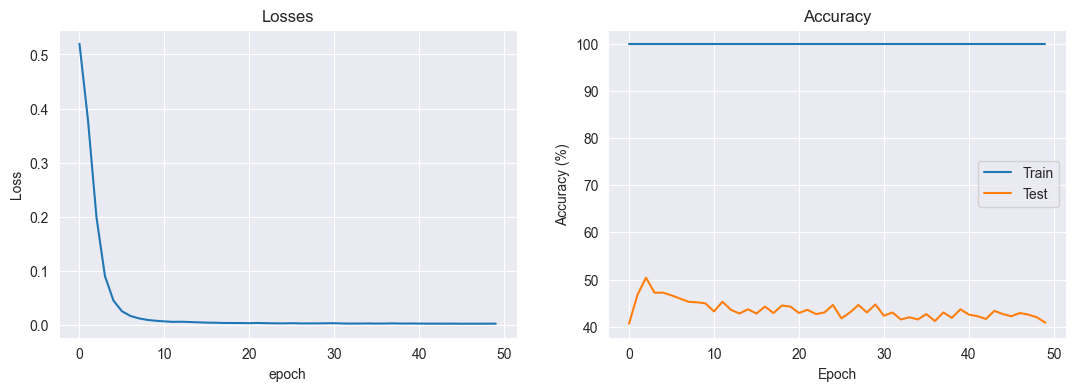

In [45]:

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses_train)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(acc_train, label='Train')
ax[1].plot(acc_val, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].legend()
plt.show()